<html>
<h1  align="center"> Desafío: Análisis exploratorio de un dataset de precios de propiedades
    <hr>
    <img align="center;" style="background-color:
#253bff"; color:"#ff5d25";" src="https://lh3.googleusercontent.com/EdkAakQ9NeCIDTOsiJ9lITY1emd4tMxZ58t1RY5xRmZ0OwtDsV7zsxttGG4TEgwKXiTgK32rfjAo2MHeZ957ArCPItUltZU8Z2xVCg"; width="30%"; height="20%">

</h1>
</html>


<h1 align="center">Introducción</h1>
La inmobiliaria Properati publica periódicamente información sobre ofertas de propiedades para
venta y alquiler. Ud. deberá asesorar a la inmobiliaria a desarrollar un modelo de regresión que
permita predecir el precio por metro cuadrado de una propiedad. El objetivo final, a
concretarse en el Desafío 2, es que el modelo que desarrollen sea utilizado como tasador
automático a ser aplicado a las próximas propiedades que sean comercializadas por la
empresa. Para ello la empresa les provee de un dataset correspondiente al primer semestre de
2017.

El dataset es de tamaño entre pequeño y mediano, pero tiene dos complejidades a las que
deberán prestarle atención:

● Peso de missing data en algunas variables relevantes.

● Será importante tener en cuenta el problema de la influencia espacial en los precios por
metro cuadrado. En efecto, es probable que existan diferencias importantes en las
diferentes geografías, barrios y zonas analizadas.
Objetivos del Desafío 1:

● Efectuar una limpieza del dataset provisto. Particularmente, deberán diseñar estrategias
para lidiar con los datos perdidos en ciertas variables.

● Realizar un análisis descriptivo de las principales variables.

● Crear nuevas columnas a partir de las características dadas que puedan tener valor
predictivo.

<h1 align="center">Requisitos y material a entregar</h1>

1. Una jupyter notebook/lab que satisfaga los requerimientos del proyecto, donde se
realice y muestre la limpieza y el análisis de los datos a ser entregados. La notebook
deberá estar debidamente comentada, y debe poder ejecutarse sin errores de principio
a fin.
2. Una exposición de no más de 10 minutos del trabajo realizado, consistente en una
presentación acompañada con algunos slides no técnicos (PPT o Google Slides).
Esta presentación debe constar de:

● Una introducción (planteo del problema, la pregunta, la descripción del dataset,
etc.)

● Un desarrollo de los análisis realizados (análisis descriptivo, análisis de
correlaciones preliminares, visualizaciones preliminares)

● Una exposición de los principales resultados y conclusiones.
Importante: Esta presentación se entregará como un video grabado, junto con el
ppt/Google slides para que pueda ser revisado por la dupla docente.

<h1 align="center">Índice del análisis</h1>

- [**Introduccion**](#Introduccion)
- [**Lectura del Data Set**](#Lectura-del-Data-Set)
- [**Graficos**](#Graficos)
- [**Subset**](#Subset)
- [**Columnas sin nulos**](#Columnas-sin-nulos)
- [**Boxplots**](#Boxplots)
- [**Geopandas**](#Geopandas)

<html><h1 align="center", style="background: #414ce8; color:white">Introduccion</h1></html>

[**Volver al Inicio**](#Índice-del-análisis) 

Planteo del problema:

 * En base a los datos disponibles del data set buscaremos estimar los campos de precios por metro cuadrado en dolares que faltan en base a medidas de tendencia central. 
 


<html><h1 align="center", style="background: #414ce8; color:white">Lectura del Data Set</h1></html>

[**Volver al Inicio**](#Índice-del-análisis) 

In [19]:
#!pip install google-colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import matplotlib.patches
import warnings

warnings.filterwarnings('ignore')

data_location = "/content/drive/MyDrive/TP Data Science/properatti.csv"
data = pd.read_csv(data_location, sep=",")
print('El data frame contiene: ',data.shape[0], ' filas y ', data.shape[1], ' columnas.')


El data frame contiene:  121220  filas y  26  columnas.


## Inicio del análisis

In [21]:
print(data.dtypes)

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [22]:
data.sample(5)

Unnamed: 0 operation property_type       place_name  \
76819        76819      sell         house  Manuel B Gonnet   
53162        53162      sell     apartment          Rosario   
117940      117940      sell     apartment          Córdoba   
79539        79539      sell     apartment          Palermo   
51323        51323      sell     apartment          Almagro   

                                  place_with_parent_names country_name  \
76819   |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Man...    Argentina   
53162                        |Argentina|Santa Fe|Rosario|    Argentina   
117940                        |Argentina|Córdoba|Córdoba|    Argentina   
79539                 |Argentina|Capital Federal|Palermo|    Argentina   
51323                 |Argentina|Capital Federal|Almagro|    Argentina   

                    state_name  geonames_id                  lat-lon  \
76819   Bs.As. G.B.A. Zona Sur          NaN                      NaN   
53162                 Santa Fe    3838574.0   -32.962097,-60.6274523   
117940                 Córdoba    3860259.0                      NaN   
79539          Capital Federal    3430234.0                      NaN   
51323          Capital Federal    3436397.0  -34.6048259,-58.4273881   

              lat  ...  surface_covered_in_m2  price_usd_per_m2  price_per_m2  \
76819         NaN  ...                  220.0               NaN           NaN   
53162  -32.962097  ...                   40.0       1430.133750  25500.000000   
117940        NaN  ...                   61.0       1101.993247  24802.950820   
79539         NaN  ...                   67.0       3380.281690   3582.089552   
51323  -34.604826  ...                   68.0       1785.902913   2705.117647   

        floor  rooms  expenses  \
76819     NaN    NaN       NaN   
53162     NaN    1.0       NaN   
117940    NaN    NaN       NaN   
79539     NaN    NaN    4900.0   
51323     1.0    3.0       NaN   

                                            properati_url  \
76819   http://www.properati.com.ar/1as2r_venta_casa_m...   
53162   http://www.properati.com.ar/19kmc_venta_depart...   
117940  http://www.properati.com.ar/1ce5z_venta_depart...   
79539   http://www.properati.com.ar/1avoi_venta_depart...   
51323   http://www.properati.com.ar/19go1_venta_depart...   

                                              description  \
76819   Casa en excelente estado desarrollada en 2 pla...   
53162   NECOCHEA 1901Departamento de 1 dormitorio a es...   
117940  Duit Propiedades presenta Edificio Mapa 03, en...   
79539   Amplio loft en venta  de 1 dormitorio en suite...   
51323   3 AMBIENTES, EN POZO, ALMAGRO!!Excelente ubica...   

                                                    title  \
76819   Casa en venta en 493 e/ Camino General Belgran...   
53162                       1 Dormitorio con vista al rio   
117940                         Departamento - Providencia   
79539                          Departamento - Las Cañitas   
51323                               DEPARTAMENTO EN VENTA   

                                          image_thumbnail  
76819   https://thumbs4.properati.com/7/JXhDv1C6ReBkpC...  
53162   https://thumbs4.properati.com/5/j7QXIsGyEpsTsf...  
117940  https://thumbs4.properati.com/4/SdVGgE7i9Zjg5G...  
79539   https://thumbs4.properati.com/3/KbSfjkfs1F09Xi...  
51323   https://thumbs4.properati.com/0/F57jzGUvKWthE2...  

[5 rows x 26 columns]

 * Capital tiene la mayor cantidad de datos de precios del data set.

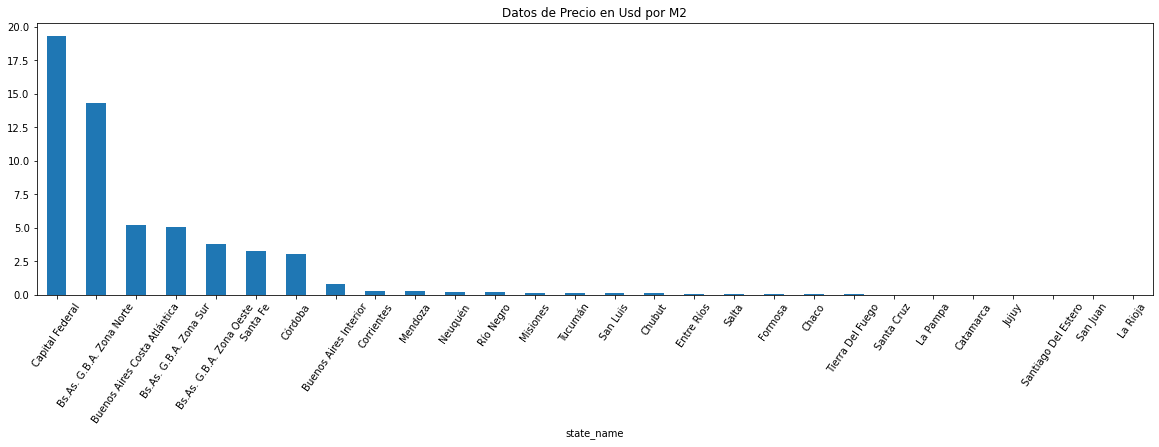

In [23]:
((data.groupby("state_name").price_usd_per_m2.count()/data.shape[0])*100).sort_values(ascending = False).plot(kind='bar' ,title ='Datos de Precio en Usd por M2', figsize= (20 , 5), rot = 55);

<html><h1 align="center", style="background: #414ce8; color:white">Graficos</h1></html>

[**Volver al Inicio**](#Índice-del-análisis) 

In [24]:
state = data.groupby('state_name')['price_usd_per_m2'].mean().sort_values(ascending = False).index
values = data.groupby('state_name')['price_usd_per_m2'].mean().sort_values(ascending = False).values

datas = {'state': state, 'price_mean': values}
df = pd.DataFrame(datas)


def getPlot(df, x, y, title , x_descripy, y_descripy,  number_color):
    fig = px.bar(df, x=x, y=y,
                title= title,
                color_discrete_sequence=[px.colors.qualitative.Alphabet[number_color]],
                width=800, height=600,
                labels={x:x_descripy, y:y_descripy},
                template="simple_white"
                )
    return fig.show()



In [25]:
getPlot(df, 'state', 'price_mean', 'Precio Promedio por Metro Cuadrado por Zona' , 'Zona', 'Precio' , 15)

In [26]:
tipo = data.groupby('property_type')['price_usd_per_m2'].mean().sort_values(ascending = False).index
values = data.groupby('property_type')['price_usd_per_m2'].mean().sort_values(ascending = False).values

datas = {'tipo': tipo, 'price_mean': values}
df = pd.DataFrame(datas)

getPlot(df, 'tipo', 'price_mean', 'Precio Promedio M2 Por Tipo de Propiedad' , 'Tipo de Propiedad', 'Precio', 21)

- En la siguiente funcion podemos sacar distintas metricas de Barrios agrupando por Zona

In [27]:
'''
                   Opciones Filtro:
                    
'Capital Federal', 'Bs.As. G.B.A. Zona Sur',
'Buenos Aires Costa Atlántica', 'Entre Ríos',
'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Córdoba',
'Bs.As. G.B.A. Zona Oeste', 'Misiones', 'Buenos Aires Interior',
'Salta', 'Neuquén', 'Río Negro', 'San Luis', 'Mendoza',
'Corrientes', 'Chubut', 'Tucumán', 'La Pampa', 'Chaco', 'San Juan',
'Santa Cruz', 'Tierra Del Fuego', 'Catamarca',
'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Formosa'


                   Opciones Estadistico:
'std':  Desvio,
'mean': Promedio,
'sum':  Sumatoria,
'cov'   Coeficiente de Variacion              
'''

def getPlotGroup(data, filtro, estadistico, number_color):
    data = data.loc[data['state_name'] == filtro, ].dropna(axis=0)
    if estadistico == 'mean':
        x = data.groupby('place_name')['price_usd_per_m2'].mean().sort_values(ascending = False).index
        y = data.groupby('place_name')['price_usd_per_m2'].mean().sort_values(ascending = False).values
    elif estadistico == 'sum':
        x = data.groupby('place_name')['price_usd_per_m2'].sum().sort_values(ascending = False).index
        y = data.groupby('place_name')['price_usd_per_m2'].sum().sort_values(ascending = False).values
    elif estadistico == 'std':
        x = data.groupby('place_name')['price_usd_per_m2'].std().sort_values(ascending = False).index
        y = data.groupby('place_name')['price_usd_per_m2'].std().sort_values(ascending = False).values
    elif estadistico == 'cov':
        x = (data.groupby('place_name')['price_usd_per_m2'].std() / data.groupby('place_name')['price_usd_per_m2'].mean() ).sort_values(ascending = False).index
        y = (data.groupby('place_name')['price_usd_per_m2'].std() / data.groupby('place_name')['price_usd_per_m2'].mean() ).sort_values(ascending = False).values
    df = pd.DataFrame({'x': x, 'y': y})
    fig = px.bar(df, x=x, y=y,
                title= estadistico + ' m2 ' + filtro,
                color_discrete_sequence=[px.colors.qualitative.Alphabet[number_color]],
                width=800, height=600,
                template="simple_white"
                )
    return fig.show()
    
'''
Funcion:
'''
    
getPlotGroup(data, 'Capital Federal', 'std' , 7)

<html><h1 align="center", style="background: #414ce8; color:white">Subset</h1></html>

[**Volver al Inicio**](#Índice-del-análisis) 


- En base al grafico anterior decidimos seguir trabajando solo con los datos de Capital Federal.

- Guardamos df_caba_original para luego de la limpieza de outliers hacer una comparacion con este data set

In [28]:
df_caba_original = data[data['state_name'] == 'Capital Federal']
df_caba = data[data['state_name'] == 'Capital Federal']
df_caba.head(5)
display(df_caba.shape)

(32316, 26)

In [29]:
df_caba.head(5)

Unnamed: 0 operation property_type place_name  \
0           0      sell            PH  Mataderos   
2           2      sell     apartment  Mataderos   
3           3      sell            PH    Liniers   
7           7      sell     apartment   Belgrano   
8           8      sell     apartment   Belgrano   

                 place_with_parent_names country_name       state_name  \
0  |Argentina|Capital Federal|Mataderos|    Argentina  Capital Federal   
2  |Argentina|Capital Federal|Mataderos|    Argentina  Capital Federal   
3    |Argentina|Capital Federal|Liniers|    Argentina  Capital Federal   
7   |Argentina|Capital Federal|Belgrano|    Argentina  Capital Federal   
8   |Argentina|Capital Federal|Belgrano|    Argentina  Capital Federal   

   geonames_id                  lat-lon        lat  ...  \
0    3430787.0  -34.6618237,-58.5088387 -34.661824  ...   
2    3430787.0  -34.6522615,-58.5229825 -34.652262  ...   
3    3431333.0  -34.6477969,-58.5164244 -34.647797  ...   
7    3436077.0   -34.5598729,-58.443362 -34.559873  ...   
8    3436077.0   -34.5598729,-58.443362 -34.559873  ...   

   surface_covered_in_m2  price_usd_per_m2 price_per_m2  floor  rooms  \
0                   40.0       1127.272727  1550.000000    NaN    NaN   
2                   55.0       1309.090909  1309.090909    NaN    NaN   
3                    NaN               NaN          NaN    NaN    NaN   
7                   40.0       3066.666667  3450.000000    NaN    NaN   
8                   60.0       3000.000000  3250.000000    NaN    NaN   

   expenses                                      properati_url  \
0       NaN  http://www.properati.com.ar/15bo8_venta_ph_mat...   
2       NaN  http://www.properati.com.ar/15bod_venta_depart...   
3       NaN  http://www.properati.com.ar/15boh_venta_ph_lin...   
7       NaN  http://www.properati.com.ar/15bot_venta_depart...   
8       NaN  http://www.properati.com.ar/15bou_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   
3  PH 3 ambientes con patio. Hay 3 deptos en lote...   
7  EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...   
8  EXCELENTE DOS AMBIENTES  ESTRENAR AMPLIO SUPER...   

                                               title  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   
3                       PH 3 amb. cfte. reciclado      
7  JOSE HERNANDEZ 1400 MONOAMBIENTE  ESTRENAR CAT...   
8  JOSE HERNANDEZ   1400 DOS AMBIENTES ESTRENAR ,...   

                                     image_thumbnail  
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...  
2  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...  
3  https://thumbs4.properati.com/3/DgIfX-85Mog5SP...  
7  https://thumbs4.properati.com/1/IHxARynlr8sPEW...  
8  https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...  

[5 rows x 26 columns]

* En el siguiente grafico podemos observar valores que estan muy lejos de los normales, en superficie y en precio.

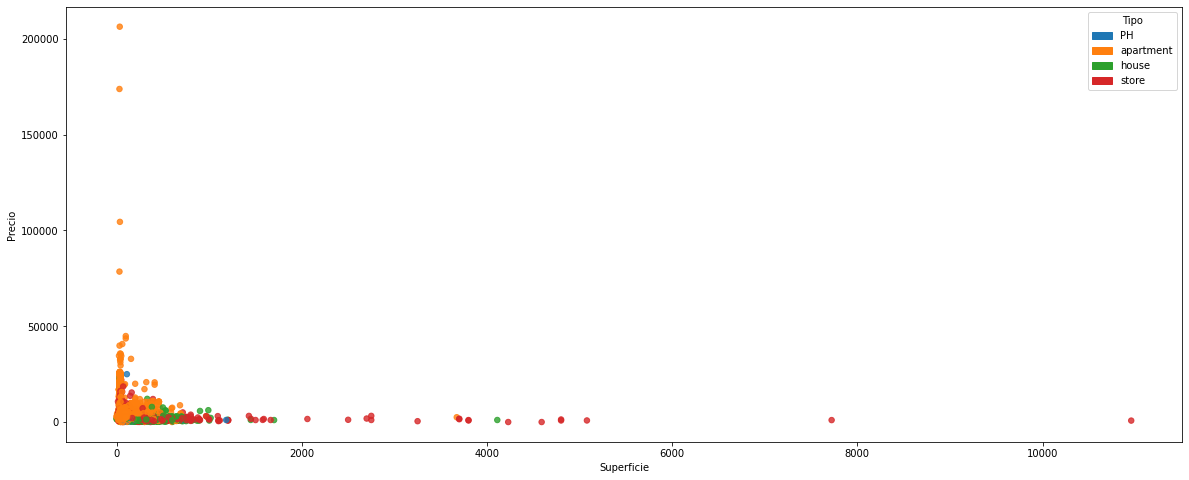

In [30]:
levels, categories = pd.factorize(df_caba['property_type'])
colors = [plt.cm.tab10(i) for i in levels] 
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

plt.scatter(df_caba['surface_covered_in_m2'],df_caba['price_usd_per_m2'], s=30, alpha=0.8, c =colors)
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.legend(handles=handles, title='Tipo')
plt.rcParams["figure.figsize"] = (20,8)
plt.show()

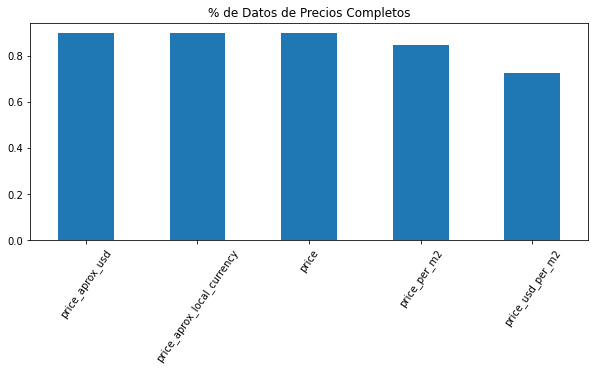

In [31]:


(df_caba[['price_usd_per_m2','price_per_m2','price_aprox_usd','price_aprox_local_currency', 'price']].notnull().sum()/df_caba.shape[0]).sort_values(ascending = False).plot(kind='bar' ,title ='% de Datos de Precios Completos', figsize= (10 , 4), rot = 55);


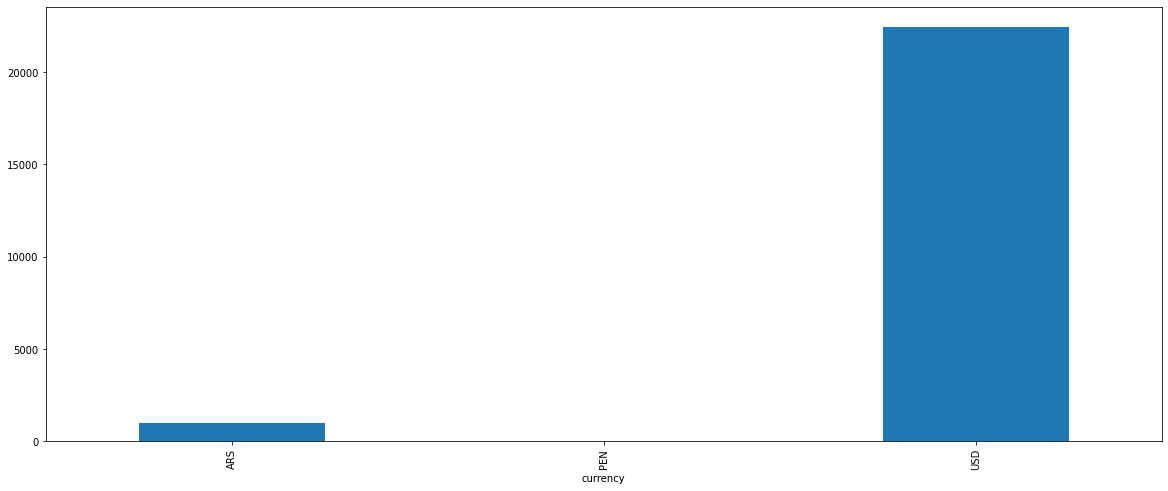

In [32]:
df_caba.groupby(['currency'])['price_usd_per_m2'].count().plot(kind='bar', stacked=True);


* Vemos que son valores de Palermo y Boedo, parecerian ser errores de tipeo. Se prodece a eliminarlos mas adelante usando una metodologia de outliers.




In [33]:
df_caba[(df_caba['price_usd_per_m2'] > 50000)]

Unnamed: 0 operation property_type place_name  \
25853       25853      sell     apartment      Boedo   
26037       26037      sell     apartment      Boedo   
26193       26193      sell     apartment      Boedo   
26637       26637      sell     apartment      Boedo   

                 place_with_parent_names country_name       state_name  \
25853  |Argentina|Capital Federal|Boedo|    Argentina  Capital Federal   
26037  |Argentina|Capital Federal|Boedo|    Argentina  Capital Federal   
26193  |Argentina|Capital Federal|Boedo|    Argentina  Capital Federal   
26637  |Argentina|Capital Federal|Boedo|    Argentina  Capital Federal   

       geonames_id                 lat-lon        lat  ...  \
25853    3436003.0                     NaN        NaN  ...   
26037    3436003.0                     NaN        NaN  ...   
26193    3436003.0                     NaN        NaN  ...   
26637    3436003.0  -34.6222039,-58.416089 -34.622204  ...   

       surface_covered_in_m2  price_usd_per_m2   price_per_m2  floor  rooms  \
25853                   30.0      78533.333333   78533.333333    NaN    1.0   
26037                   30.0     173826.066667  173826.066667    NaN    1.0   
26193                   35.0     104486.114286  104486.114286    NaN    1.0   
26637                   33.0     206333.333333  206333.333333    NaN    1.0   

       expenses                                      properati_url  \
25853       NaN  http://www.properati.com.ar/17qgx_venta_depart...   
26037       NaN  http://www.properati.com.ar/17qou_venta_depart...   
26193       NaN  http://www.properati.com.ar/17quf_venta_depart...   
26637       NaN  http://www.properati.com.ar/17rbf_venta_depart...   

                                             description  \
25853  bf221- INCREIBLE FORMA DE PAGO- ANT Y CUOTAS D...   
26037  lan840- DEPTO FINANCIACION DIRECTA EN PESOSAnt...   
26193  fac030- Depto anticipo en 10 meses y saldo en ...   
26637  Departamento  1 ambiente divisible Depto en CU...   

                                                   title  \
25853  bf221- INCREIBLE FORMA DE PAGO- ANT Y CUOTAS D...   
26037        lan840- DEPTO FINANCIACION DIRECTA EN PESOS   
26193  fac030- Depto anticipo en 10 meses y saldo en ...   
26637    Tu depa, ingresa con $ 29.000 y cuotas en pesos   

                                         image_thumbnail  
25853  https://thumbs4.properati.com/5/-g7Ufd8oE1D5gC...  
26037  https://thumbs4.properati.com/0/cr-NvID1VVGL4R...  
26193  https://thumbs4.properati.com/5/6ieB5ag091SbEO...  
26637  https://thumbs4.properati.com/0/S-zC2PgWGFWuGB...  

[4 rows x 26 columns]

In [34]:

df_caba[(df_caba['surface_covered_in_m2']> 6000)]

Unnamed: 0 operation property_type     place_name  \
56484        56484      sell     apartment   Monte Castro   
56791        56791      sell         house        Liniers   
64104        64104      sell     apartment        Palermo   
66045        66045      sell         store           Boca   
69115        69115      sell         store  Villa Soldati   
76012        76012      sell     apartment   Barrio Norte   
109722      109722      sell     apartment       Floresta   
114174      114174      sell     apartment         Flores   

                          place_with_parent_names country_name  \
56484    |Argentina|Capital Federal|Monte Castro|    Argentina   
56791         |Argentina|Capital Federal|Liniers|    Argentina   
64104         |Argentina|Capital Federal|Palermo|    Argentina   
66045            |Argentina|Capital Federal|Boca|    Argentina   
69115   |Argentina|Capital Federal|Villa Soldati|    Argentina   
76012    |Argentina|Capital Federal|Barrio Norte|    Argentina   
109722       |Argentina|Capital Federal|Floresta|    Argentina   
114174         |Argentina|Capital Federal|Flores|    Argentina   

             state_name  geonames_id                        lat-lon  \
56484   Capital Federal    3430596.0          -34.618411,-58.497949   
56791   Capital Federal    3431333.0          -34.642482,-58.528451   
64104   Capital Federal    3430234.0          -34.588259,-58.409503   
66045   Capital Federal    3436004.0  -34.6443487086,-58.3654248049   
69115   Capital Federal    3427366.0  -34.6601221702,-58.4302513174   
76012   Capital Federal    3436109.0   -34.5945726028,-58.409166395   
109722  Capital Federal    3433910.0  -34.6317378902,-58.4794281617   
114174  Capital Federal    3433918.0          -34.630699,-58.472579   

              lat  ...  surface_covered_in_m2  price_usd_per_m2 price_per_m2  \
56484  -34.618411  ...                 9152.0               NaN    15.078671   
56791  -34.642482  ...                 8175.0               NaN    20.183486   
64104  -34.588259  ...                 7029.0               NaN    31.298905   
66045  -34.644349  ...                 7722.0       1036.001036  1036.001036   
69115  -34.660122  ...                10958.0        775.688994   775.688994   
76012  -34.594573  ...               187000.0               NaN     3.208556   
109722 -34.631738  ...                 6534.0               NaN    16.528926   
114174 -34.630699  ...                 6062.0               NaN    21.280106   

        floor  rooms  expenses  \
56484     3.0    4.0       NaN   
56791     NaN    4.0       NaN   
64104     6.0    4.0       NaN   
66045     NaN    NaN       1.0   
69115     NaN    NaN       1.0   
76012     NaN    NaN   11000.0   
109722    5.0    4.0       NaN   
114174    8.0    2.0       NaN   

                                            properati_url  \
56484   http://www.properati.com.ar/19r6g_venta_depart...   
56791   http://www.properati.com.ar/19rpq_venta_casa_l...   
64104   http://www.properati.com.ar/1aa1j_venta_depart...   
66045   http://www.properati.com.ar/1ad9w_venta_local_...   
69115   http://www.properati.com.ar/1ahu2_venta_local_...   
76012   http://www.properati.com.ar/1ar12_venta_depart...   
109722  http://www.properati.com.ar/1c2kh_venta_depart...   
114174  http://www.properati.com.ar/1c9im_venta_depart...   

                                              description  \
56484   Corredor Responsable: Uno Bienes Raices SRL - ...   
56791   Corredor Responsable: Jorge Salafia - CUCICBA ...   
64104   Corredor Responsable: Cristian Arnal Ponti - C...   
66045   C.A.B.A - Boca - PRECIO A CONSULTAR - CÓDIGO 0...   
69115   C.A.B.A - Villa Soldati - CÓDIGO 0146Excelente...   
76012   Barrio Norte EXCELENTE Semipiso al Frente Balc...   
109722  Corredor Responsable: Hernan Perrone - C.U.C.I...   
114174  Corredor Responsable: RAMIRO EL KADI - CUCICBA...   

                                                    title  \
56484          Excelente depto de 


### Limpiando Outliers:



- Se agrupan por Zona y tipo de inmueble. Luego se sacan los percentiles 75 y 25, el rango intercuartil y mediante la metodologia de los outliers se extraen los indices de los precios por metro cuadrado en dolares que estan considerados como outliers para este trabajo.

In [35]:
display(df_caba.shape)
df_caba = df_caba[~(df_caba.price_usd_per_m2 > 15000)]
display(df_caba.shape)

(32316, 26)

(31802, 26)

In [36]:
import itertools
#Podriamos hacer un apply


lista_index   = []
for i in range(len(df_caba.place_name.unique())):
    for tipo in list(df_caba.property_type.unique()):
        try:
            q75,q25 = np.nanpercentile(df_caba.loc[(df_caba.place_name == df_caba.place_name.unique()[i]) &  (df_caba.property_type == tipo), ['price_usd_per_m2']], [75, 25])
            rango_max = q75 + 1.5 * (q75 - q25)   
            rango_min = q25 - 1.5 * (q75 - q25) 
            index_maximos = list(df_caba.loc[(df_caba.place_name == df_caba.place_name.unique()[i]) &  (df_caba.property_type == tipo), ['price_usd_per_m2']][df_caba['price_usd_per_m2'] > rango_max].index)
            index_minimos = list(df_caba.loc[(df_caba.place_name == df_caba.place_name.unique()[i]) &  (df_caba.property_type == tipo), ['price_usd_per_m2']][df_caba['price_usd_per_m2'] < rango_min].index)
            index_total = index_maximos + index_minimos
            if len(index_total) >= 1:
                lista_index.append(index_total)
        except Exception as error:
            print(df_caba.place_name.unique()[i], ' No tiene: ', tipo)
lista_filtro = list(itertools.chain.from_iterable(lista_index))
print('Total de indices a eliminar: ',len(lista_filtro))

Puerto Madero  No tiene:  PH
Villa Pueyrredón  No tiene:  store
Parque Centenario  No tiene:  house
Parque Avellaneda  No tiene:  store
Versalles  No tiene:  store
Retiro  No tiene:  PH
Centro / Microcentro  No tiene:  PH
Once  No tiene:  house
Tribunales  No tiene:  house
Catalinas  No tiene:  PH
Catalinas  No tiene:  house
Villa General Mitre  No tiene:  store
Villa Riachuelo  No tiene:  store
Total de indices a eliminar:  1010


In [37]:
df_caba.drop(lista_filtro, axis=0, inplace=True)
df_caba.reset_index(drop=True, inplace=True)
df_caba.shape

(30792, 26)

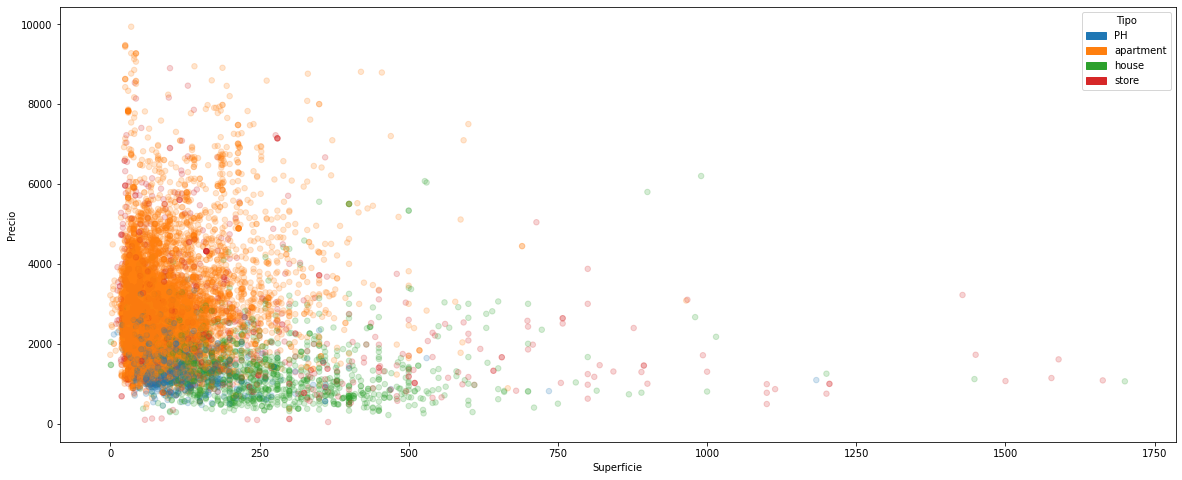

In [38]:
df_caba_filter = df_caba.loc[(df_caba['surface_covered_in_m2'] < 2000) & (df_caba['price_usd_per_m2'] < 10000)]

levels, categories = pd.factorize(df_caba_filter['property_type'])
colors = [plt.cm.tab10(i) for i in levels] 
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

plt.scatter(df_caba_filter['surface_covered_in_m2'],df_caba_filter['price_usd_per_m2'], s=30, alpha=0.2, c =colors)
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.legend(handles=handles, title='Tipo')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

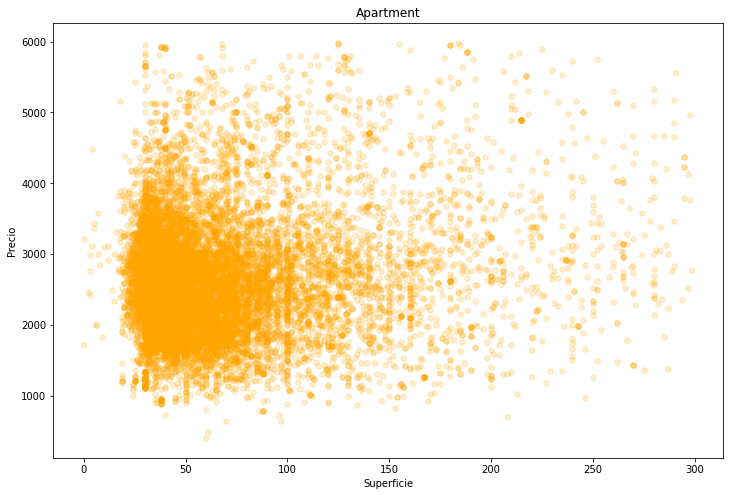

In [39]:
df_caba_filter = df_caba.loc[(df_caba['surface_covered_in_m2'] < 300) & (df_caba['price_usd_per_m2'] < 6000)]

plt.scatter(df_caba_filter.loc[df_caba_filter['property_type'] == 'apartment' , ['surface_covered_in_m2']], df_caba_filter.loc[df_caba_filter['property_type'] == 'apartment' , ['price_usd_per_m2']], s=30, alpha=0.2, c = 'orange')
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.title('Apartment')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

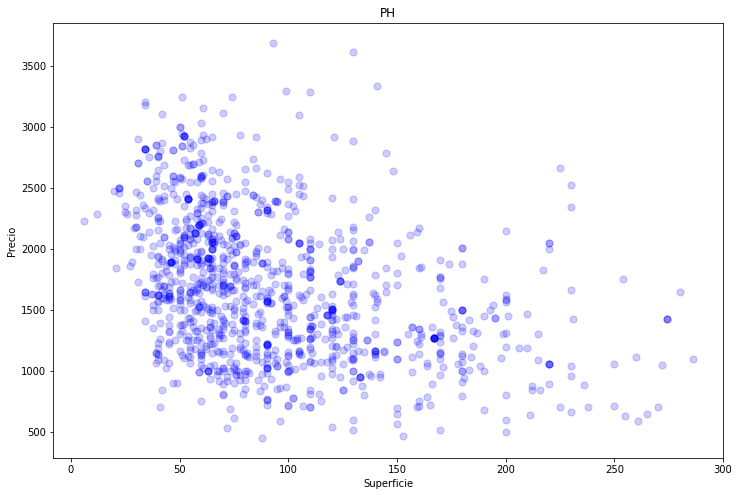

In [40]:
df_caba_filter = df_caba.loc[(df_caba['surface_covered_in_m2'] < 300) & (df_caba['price_usd_per_m2'] < 6000)]

plt.scatter(df_caba_filter.loc[df_caba_filter['property_type'] == 'PH' , ['surface_covered_in_m2']], df_caba_filter.loc[df_caba_filter['property_type'] == 'PH' , ['price_usd_per_m2']], s=50, alpha=0.2, c = 'blue')
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.title('PH')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

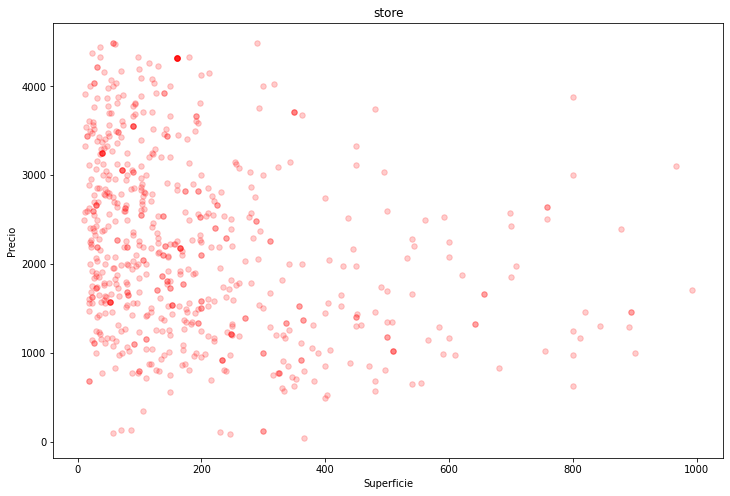

In [41]:
df_caba_filter = df_caba.loc[(df_caba['surface_covered_in_m2'] < 1000) & (df_caba['price_usd_per_m2'] < 4500)]

plt.scatter(df_caba_filter.loc[df_caba_filter['property_type'] == 'store' , ['surface_covered_in_m2']], df_caba_filter.loc[df_caba_filter['property_type'] == 'store' , ['price_usd_per_m2']], s=30, alpha=0.2, c = 'red')
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.title('store')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

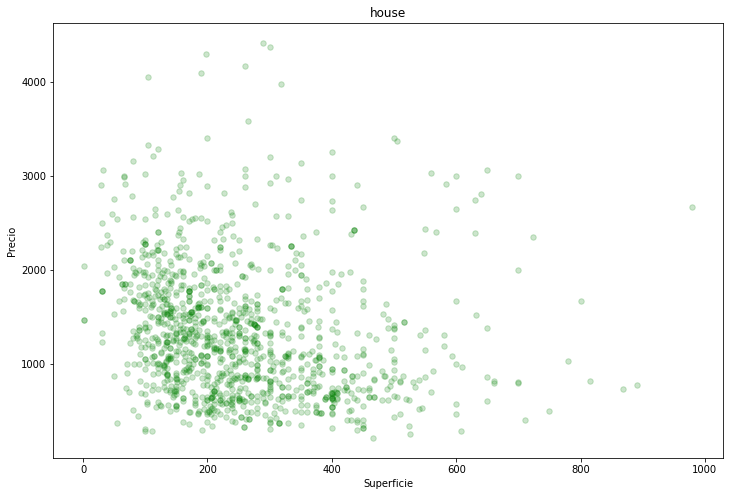

In [42]:
df_caba_filter = df_caba.loc[(df_caba['surface_covered_in_m2'] < 1000) & (df_caba['price_usd_per_m2'] < 4500)]

plt.scatter(df_caba_filter.loc[df_caba_filter['property_type'] == 'house' , ['surface_covered_in_m2']], df_caba_filter.loc[df_caba_filter['property_type'] == 'house' , ['price_usd_per_m2']], s=30, alpha=0.2, c = 'green')
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.title('house')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()


### Graficando Outliers:



- El siguiente grafico muestra dos outputs, uno con boxplots que contiene outliers y otro sin los outliers.

In [43]:
from time import sleep
from IPython.display import clear_output
import plotly.express as px

'''
zonas = list(df_caba.place_name.unique())
for zona in zonas:
    x        = df_caba_original.loc[df_caba_original['place_name'] == zona, ]['place_name']
    y        = df_caba_original.loc[df_caba_original['place_name'] == zona, ]['price_usd_per_m2']
    color    = df_caba_original.loc[df_caba_original['place_name'] == zona, ]['property_type']
    x_dos    = df_caba.loc[df_caba['place_name'] == zona, ]['place_name']
    y_dos    = df_caba.loc[df_caba['place_name'] == zona, ]['price_usd_per_m2']
    color_dos= df_caba.loc[df_caba['place_name'] == zona, ]['property_type']
    fig      = px.box(df_caba_original, x= x, y=y, points="all", color = color, title="Zona por Tipo de departamento Con Outliers")
    figdos   = px.box(df_caba, x= x_dos, y=y_dos, points="all", color = color_dos, title="Zona por Tipo de departamento Sin Outliers")
    fig.show()
    figdos.show()
    sleep(2.5)
    clear_output(wait=True)
'''

'\nzonas = list(df_caba.place_name.unique())\nfor zona in zonas:\n    x        = df_caba_original.loc[df_caba_original[\'place_name\'] == zona, ][\'place_name\']\n    y        = df_caba_original.loc[df_caba_original[\'place_name\'] == zona, ][\'price_usd_per_m2\']\n    color    = df_caba_original.loc[df_caba_original[\'place_name\'] == zona, ][\'property_type\']\n    x_dos    = df_caba.loc[df_caba[\'place_name\'] == zona, ][\'place_name\']\n    y_dos    = df_caba.loc[df_caba[\'place_name\'] == zona, ][\'price_usd_per_m2\']\n    color_dos= df_caba.loc[df_caba[\'place_name\'] == zona, ][\'property_type\']\n    fig      = px.box(df_caba_original, x= x, y=y, points="all", color = color, title="Zona por Tipo de departamento Con Outliers")\n    figdos   = px.box(df_caba, x= x_dos, y=y_dos, points="all", color = color_dos, title="Zona por Tipo de departamento Sin Outliers")\n    fig.show()\n    figdos.show()\n    sleep(2.5)\n    clear_output(wait=True)\n'

In [44]:
zona="Boedo"
x        = df_caba_original.loc[df_caba_original['place_name'] == zona, ]['place_name']
y        = df_caba_original.loc[df_caba_original['place_name'] == zona, ]['price_usd_per_m2']
color    = df_caba_original.loc[df_caba_original['place_name'] == zona, ]['property_type']
x_dos    = df_caba.loc[df_caba['place_name'] == zona, ]['place_name']
y_dos    = df_caba.loc[df_caba['place_name'] == zona, ]['price_usd_per_m2']
color_dos= df_caba.loc[df_caba['place_name'] == zona, ]['property_type']
fig      = px.box(df_caba_original, x= x, y=y, points="all", color = color, title="Zona por Tipo de departamento Con Outliers")
figdos   = px.box(df_caba, x= x_dos, y=y_dos, points="all", color = color_dos, title="Zona por Tipo de departamento Sin Outliers")
fig.show()
figdos.show()


### Valores Nulos:


- Podemos observar que la columna <b>floor</b> ,<b>expensas</b> y <b>rooms</b> contienen mas del 60 % de valores como nulos.

In [45]:
round(df_caba.isnull().sum() / df_caba.shape[0],2).sort_values(ascending = False)

floor                         0.90
expenses                      0.79
rooms                         0.53
price_usd_per_m2              0.29
lat-lon                       0.25
lat                           0.25
lon                           0.25
surface_total_in_m2           0.19
price_per_m2                  0.16
price_aprox_local_currency    0.11
price                         0.11
currency                      0.11
price_aprox_usd               0.11
surface_covered_in_m2         0.07
geonames_id                   0.04
image_thumbnail               0.02
operation                     0.00
state_name                    0.00
country_name                  0.00
place_with_parent_names       0.00
place_name                    0.00
property_type                 0.00
properati_url                 0.00
description                   0.00
title                         0.00
Unnamed: 0                    0.00
dtype: float64


- Exploramos algunas variables para ver si podemos ir limpiando el dataset:


In [46]:
for i in range(len(df_caba.columns)):
    if len(df_caba[df_caba.columns.values[i]].unique()) == 1 or round(df_caba.isnull().sum() / df_caba.shape[0],2)[i] >= 0.5:
        print('La columna :',df_caba.columns[i], 'tiene ', len(df_caba[df_caba.columns.values[i]].unique()), 'valor/es unico/s y el', 100 * round(df_caba.isnull().sum() / df_caba.shape[0],2)[i], '% de valores Nulos')

La columna : operation tiene  1 valor/es unico/s y el 0.0 % de valores Nulos
La columna : country_name tiene  1 valor/es unico/s y el 0.0 % de valores Nulos
La columna : state_name tiene  1 valor/es unico/s y el 0.0 % de valores Nulos
La columna : floor tiene  86 valor/es unico/s y el 90.0 % de valores Nulos
La columna : rooms tiene  18 valor/es unico/s y el 53.0 % de valores Nulos
La columna : expenses tiene  732 valor/es unico/s y el 79.0 % de valores Nulos


In [47]:
df_caba.drop('floor',        inplace=True, axis=1)
df_caba.drop('expenses',     inplace=True, axis=1)
df_caba.drop('Unnamed: 0',   inplace=True, axis=1)
df_caba.drop('operation',    inplace=True, axis=1)
df_caba.drop('country_name', inplace=True, axis=1)

In [48]:

print('El data frame contiene: ',df_caba.shape[0], ' filas y ', df_caba.shape[1], ' columnas.')
df_caba.head(4)


El data frame contiene:  30792  filas y  21  columnas.


property_type place_name                place_with_parent_names  \
0            PH  Mataderos  |Argentina|Capital Federal|Mataderos|   
1     apartment  Mataderos  |Argentina|Capital Federal|Mataderos|   
2            PH    Liniers    |Argentina|Capital Federal|Liniers|   
3     apartment   Belgrano   |Argentina|Capital Federal|Belgrano|   

        state_name  geonames_id                  lat-lon        lat  \
0  Capital Federal    3430787.0  -34.6618237,-58.5088387 -34.661824   
1  Capital Federal    3430787.0  -34.6522615,-58.5229825 -34.652262   
2  Capital Federal    3431333.0  -34.6477969,-58.5164244 -34.647797   
3  Capital Federal    3436077.0   -34.5598729,-58.443362 -34.559873   

         lon     price currency  ...  price_aprox_usd  surface_total_in_m2  \
0 -58.508839   62000.0      USD  ...          62000.0                 55.0   
1 -58.522982   72000.0      USD  ...          72000.0                 55.0   
2 -58.516424   95000.0      USD  ...          95000.0                  NaN   
3 -58.443362  138000.0      USD  ...         138000.0                 45.0   

   surface_covered_in_m2  price_usd_per_m2  price_per_m2  rooms  \
0                   40.0       1127.272727   1550.000000    NaN   
1                   55.0       1309.090909   1309.090909    NaN   
2                    NaN               NaN           NaN    NaN   
3                   40.0       3066.666667   3450.000000    NaN   

                                       properati_url  \
0  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1  http://www.properati.com.ar/15bod_venta_depart...   
2  http://www.properati.com.ar/15boh_venta_ph_lin...   
3  http://www.properati.com.ar/15bot_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   
2  PH 3 ambientes con patio. Hay 3 deptos en lote...   
3  EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...   

                                               title  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB   
1           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   
2                       PH 3 amb. cfte. reciclado      
3  JOSE HERNANDEZ 1400 MONOAMBIENTE  ESTRENAR CAT...   

                                     image_thumbnail  
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...  
1  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...  
2  https://thumbs4.properati.com/3/DgIfX-85Mog5SP...  
3  https://thumbs4.properati.com/1/IHxARynlr8sPEW...  

[4 rows x 21 columns]

In [49]:
round(df_caba.isnull().sum() / df_caba.shape[0],2).sort_values(ascending = False)

rooms                         0.53
price_usd_per_m2              0.29
lat-lon                       0.25
lat                           0.25
lon                           0.25
surface_total_in_m2           0.19
price_per_m2                  0.16
price_aprox_local_currency    0.11
price                         0.11
currency                      0.11
price_aprox_usd               0.11
surface_covered_in_m2         0.07
geonames_id                   0.04
image_thumbnail               0.02
place_name                    0.00
state_name                    0.00
place_with_parent_names       0.00
properati_url                 0.00
description                   0.00
title                         0.00
property_type                 0.00
dtype: float64

<html><h1 align="center", style="background: #414ce8; color:white">Columnas sin nulos</h1></html>

[**Volver al Inicio**](#Índice-del-análisis) 

In [50]:

for i in range(len(df_caba.columns)):
    if round(df_caba.isnull().sum() / df_caba.shape[0],2)[i] == 0:
        print(df_caba.columns[i], ' tiene ', round(df_caba.isnull().sum() / df_caba.shape[0],2)[i], ' valores Nulos')


property_type  tiene  0.0  valores Nulos
place_name  tiene  0.0  valores Nulos
place_with_parent_names  tiene  0.0  valores Nulos
state_name  tiene  0.0  valores Nulos
properati_url  tiene  0.0  valores Nulos
description  tiene  0.0  valores Nulos
title  tiene  0.0  valores Nulos


<h3 align="left", style="background: white; color:black">Podemos obtener datos relevantes de: description y title</h3>

In [51]:
print('description: \n')
display(df_caba['description'].head(5))
print('\ntitle: \n')
display(df_caba['title'].head(5))

description: 



0    2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...
1    2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...
2    PH 3 ambientes con patio. Hay 3 deptos en lote...
3    EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...
4    EXCELENTE DOS AMBIENTES  ESTRENAR AMPLIO SUPER...
Name: description, dtype: object


title: 



0                   2 AMB TIPO CASA SIN EXPENSAS EN PB
1             2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
2                         PH 3 amb. cfte. reciclado   
3    JOSE HERNANDEZ 1400 MONOAMBIENTE  ESTRENAR CAT...
4    JOSE HERNANDEZ   1400 DOS AMBIENTES ESTRENAR ,...
Name: title, dtype: object

<h2 align="left", style="background: white; color:black">Libreria nltk</h2>

- Utilizamos la libreria para limpiar la columna descripcion de StopWords

In [52]:
pip install nltk

In [53]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [54]:
# !pip install nltk
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
len(stopwords)
stopwords.append('-')
stopwords.append(' ')
print('Primeros StopWords: ',stopwords[0:15])

Primeros StopWords:  ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con']


<h2 align="left", style="background: white; color:black">Filtro de Palabras</h2>

<h3 align="left", style="background: white; color:red">Importante: </h3>
<b> El siguiente comando puede durar mas de 1 minuto de ejecucion ya que recorre todas las filas y cada uno de los StopWords: </b>

In [55]:
df_caba = df_caba.reset_index()

In [56]:
#Podriamos hacer un apply
elementos_sin_stowpords_descripcion = []
elementos_sin_stowpords_titulo = []
for i in range(df_caba.shape[0]):
    elemento_descripcion = ' '.join([word for word in df_caba['description'][i].lower().split(' ') if word not in stopwords])
    elementos_sin_stowpords_descripcion.append(elemento_descripcion)
    elemento_titulo = ' '.join([word for word in df_caba['title'][i].lower().split(' ') if word not in stopwords])
    elementos_sin_stowpords_titulo.append(elemento_titulo)

<h3 align="left", style="background: white; color:black">Descripcion: </h3>

In [57]:
print('Con Stopwords:\n')
print('Longitud: ',len(df_caba['description']),'\n')
display(df_caba['description'][0].lower())
print('\nSin Stopwords: \n')
print('Longitud: ',len(elementos_sin_stowpords_descripcion),'\n')
display(elementos_sin_stowpords_descripcion[0])

Con Stopwords:

Longitud:  30792 



'2 ambientes tipo casa planta baja por pasillo, refaccionado a nuevo, patio grande, con lavadero, living comedor con cocina integrada, artefacto de cocina, alacena, baño completo, y dormitorio. todo en excelente estado, para habitar.no es apto credito aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias).'


Sin Stopwords: 

Longitud:  30792 



'2 ambientes tipo casa planta baja pasillo, refaccionado nuevo, patio grande, lavadero, living comedor cocina integrada, artefacto cocina, alacena, baño completo, dormitorio. excelente estado, habitar.no apto credito aviso publicado pixel inmobiliario (servicio páginas web inmobiliarias).'

<h3 align="left", style="background: white; color:black">Titulo: </h3>

In [58]:
print('Con Stopwords:\n')
print('Longitud: ',len(df_caba['title']),'\n')
display(df_caba['title'][3].lower())
print('\nSin Stopwords: \n')
print('Longitud: ',len(elementos_sin_stowpords_titulo),'\n')
display(elementos_sin_stowpords_titulo[3])

Con Stopwords:

Longitud:  30792 



'jose hernandez 1400 monoambiente  estrenar categoria , venta'


Sin Stopwords: 

Longitud:  30792 



'jose hernandez 1400 monoambiente  estrenar categoria , venta'

- Almacenamos todas las Palabras netas de StopWords que aparecen en descripcion y en titulo para ver cuales se encuentran con mayor frecuencia

In [59]:
palabras_descripcion = []
for i in range(len(elementos_sin_stowpords_descripcion)):
    lista_uno = elementos_sin_stowpords_descripcion[i]
    lista_uno = lista_uno.split(' ')
    for lista in lista_uno:
        palabras_descripcion.append(lista)
        
palabras_titulo = []
for i in range(len(elementos_sin_stowpords_titulo)):
    lista_uno = elementos_sin_stowpords_titulo[i]
    lista_uno = lista_uno.split(' ')
    for lista in lista_uno:
        palabras_titulo.append(lista)

- Value Counts titulo y descripcion

In [60]:
values_descripcion = pd.Series(palabras_descripcion).value_counts()

values_descripcion = values_descripcion[1:] # Eliminamos el primer elemento ya que son vacios

values_titulo = pd.Series(palabras_titulo).value_counts()


print('Descripcion Value Counts:\n')
display(values_descripcion)
print('\nTitulo Value Counts: \n')
display(values_titulo)



Descripcion Value Counts:



cocina                                       19646
2                                            17798
baño                                         16215
ambientes                                    14895
3                                            13860
                                             ...  
link)https://youtu.be/edo2moy0-luedificio        1
(hacer                                           1
ascensoreslink                                   1
visor-2                                          1
iap478380izrastzoff                              1
Length: 118363, dtype: int64


Titulo Value Counts: 



departamento            13158
venta                    8571
ambientes                5374
                         5255
2                        3890
                        ...  
ctrafrente.                 1
4.60                        1
twins!!!!                   1
demaría                     1
semipso.monoambiente        1
Length: 10351, dtype: int64

<h2 align="left", style="background: white; color:black">Grafico de Palabas</h2>

- Para Descripcion podemos buscar alguna funcion para crear una columna aparte con la cantidad de ambientes y/o alguna variable mas para cuando hagamos los groupby para estimar los precios faltantes tengamos mejor segmentacion, no solo por barrio y metro cuadrado sino tambien por otras mas variables. La idea seria crear columnas nuevas para ambientes por ejemplo.

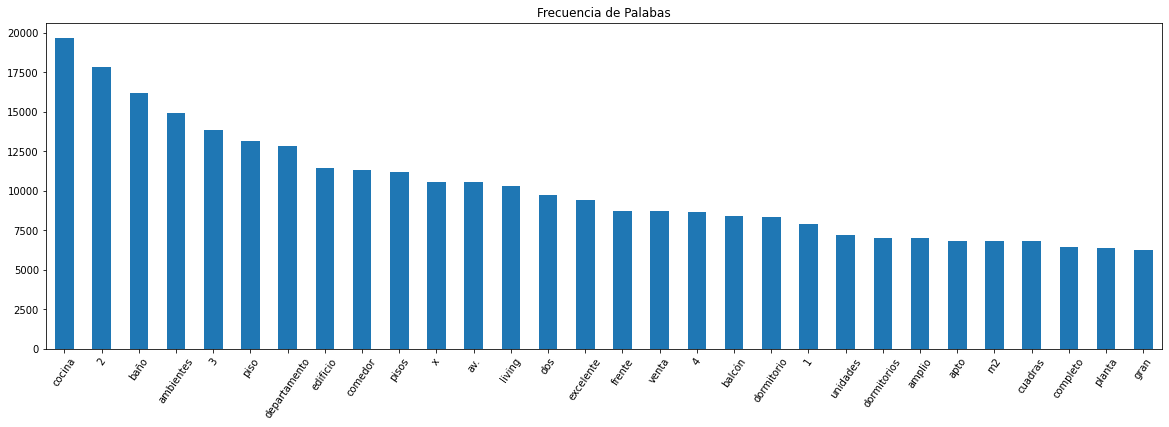

In [61]:
def plotValues(valores, minimo, maximo):
    return valores[minimo:maximo].plot(kind='bar',title ='Frecuencia de Palabas', figsize= (20 , 6), rot = 55);

plotValues(values_descripcion, 0, 30);

- Para Title

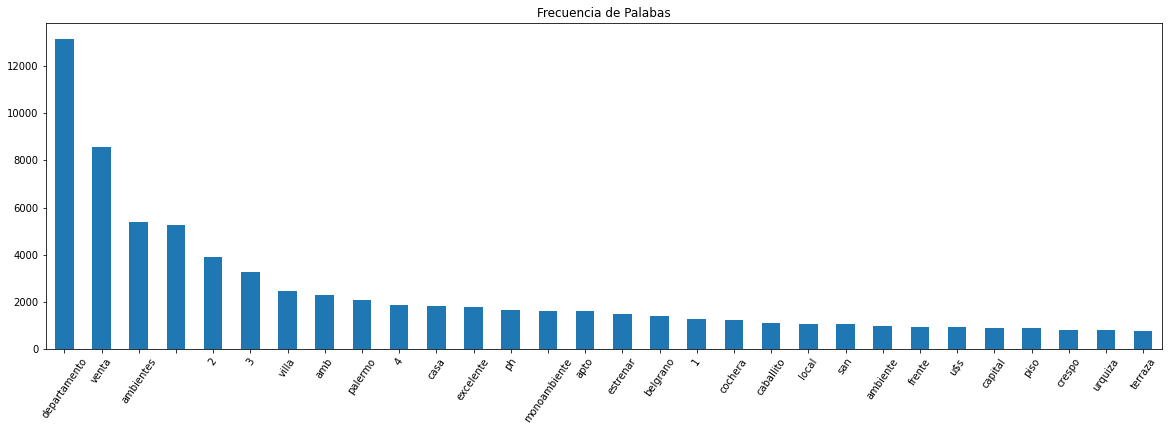

In [62]:
plotValues(values_titulo,  0, 30);

<h2 align="left", style="background: white; color:black">Ambientes en Titulo y Descripcion</h2>

In [63]:
ambientes_descripcion = []
ambientes_titulo = []


diccionario_replace = { 'uno' : 1, 'dos' : 2, 'tres' : 3 , 'cuatro' : 4, 'cinco' : 5 , 'seis' : 6, 'siete' : 7 , 'ocho' : 8 , 'nueve' : 9 , 'dies' : 10 , 'diez': 10,
                       '1' : 1, '2' : 2, '3' : 3 , '4' : 4, '5' : 5 ,'6' : 6, '7' : 7 ,'8' : 8 ,'9' : 9, '10' : 10,'un' : 1, 'mono' : 1}

tuppla_filtros = ( 'ambientes' , 'amb.' , 'amb' )

tuppla_monoambientes = ('monoambiente'  ,'mono-ambiente' ,'ambiente' )



for description in elementos_sin_stowpords_descripcion:
    element = description.split(' ')
    clean_elem = None
    for i in range(len(element)):
        ele = element[i].lower().replace(',','').replace('.','').replace('-','').replace(';','')
        if ele in tuppla_filtros:
            aux = element[i-1].lower()
            clean_elem = diccionario_replace.get(aux)
            if not clean_elem:
                break
        if ele in tuppla_monoambientes:
            clean_elem = 1
            break
    ambientes_descripcion.append(clean_elem)

    
for description in elementos_sin_stowpords_titulo:
    element = description.split(' ')
    clean_elem = None
    for i in range(len(element)):
        ele = element[i].lower().replace(',','').replace('.','').replace('-','').replace(';','')
        if ele in tuppla_filtros:
            aux = element[i-1].lower()
            clean_elem = diccionario_replace.get(aux)
            if not clean_elem:
                break
        if ele in tuppla_monoambientes:
            clean_elem = 1
            break
    ambientes_titulo.append(clean_elem)

In [64]:
display(len(ambientes_descripcion))
pd.Series(ambientes_descripcion).value_counts()

30792

1.0     5564
2.0     4000
3.0     3706
4.0     2192
5.0      414
6.0      112
7.0       51
8.0       13
9.0        6
10.0       6
dtype: int64

In [65]:
display(len(ambientes_titulo))
pd.Series(ambientes_titulo).value_counts()

30792

2.0     3173
1.0     3024
3.0     2870
4.0     1685
5.0      415
6.0      112
7.0       59
8.0       22
9.0        9
10.0       2
dtype: int64

In [66]:
print('La columna Descripcion para ambientes tiene: ',pd.Series(ambientes_descripcion).isnull().sum(),'nulos, mientras que la columna Title para ambientes tiene: ',pd.Series(ambientes_titulo).isnull().sum())

La columna Descripcion para ambientes tiene:  14728 nulos, mientras que la columna Title para ambientes tiene:  19421


<h2 align="left", style="background: white; color:black">Unificacion</h2>

In [67]:
lista_ambientes_final = []
for i in range(len(ambientes_descripcion)):
    if ambientes_descripcion[i] == None:
        lista_ambientes_final.append(ambientes_titulo[i])
    else:
        lista_ambientes_final.append(ambientes_descripcion[i])
        
print('Completamos el % ',(pd.Series(lista_ambientes_final).value_counts().sum()/df_caba.shape[0])*100, 'del data set')

Completamos el %  64.88048843855547 del data set


In [68]:
df_caba['ambientes'] = pd.Series(lista_ambientes_final)

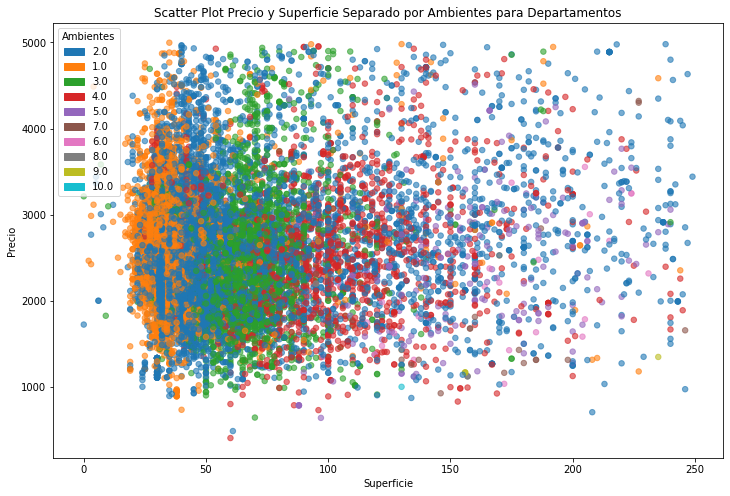

In [69]:
df_caba_apartment = df_caba.loc[df_caba['property_type'] == 'apartment' , :]
df_caba_filter_apartment = df_caba_apartment.loc[(df_caba_apartment['surface_covered_in_m2'] < 250) & (df_caba_apartment['price_usd_per_m2'] < 5000)]

levels, categories = pd.factorize(df_caba_filter_apartment['ambientes'])
colors = [plt.cm.tab10(i) for i in levels] 
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

plt.scatter(df_caba_filter_apartment['surface_covered_in_m2'],df_caba_filter_apartment['price_usd_per_m2'], s=30, alpha=0.6, c =colors)
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.title('Scatter Plot Precio y Superficie Separado por Ambientes para Departamentos')
plt.legend(handles=handles, title='Ambientes')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()


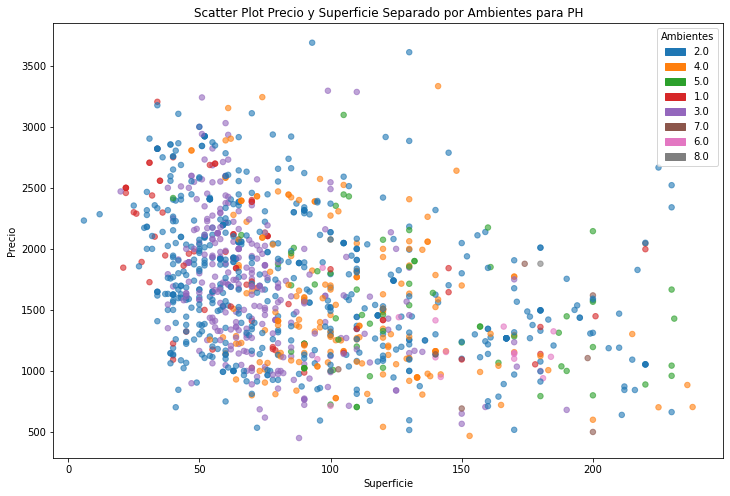

In [70]:
df_caba_apartment = df_caba.loc[df_caba['property_type'] == 'PH' , :]
df_caba_filter_apartment = df_caba_apartment.loc[(df_caba_apartment['surface_covered_in_m2'] < 250) & (df_caba_apartment['price_usd_per_m2'] < 5000)]

levels, categories = pd.factorize(df_caba_filter_apartment['ambientes'])
colors = [plt.cm.tab10(i) for i in levels] 
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

plt.scatter(df_caba_filter_apartment['surface_covered_in_m2'],df_caba_filter_apartment['price_usd_per_m2'], s=30, alpha=0.6, c =colors)
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.title('Scatter Plot Precio y Superficie Separado por Ambientes para PH')
plt.legend(handles=handles, title='Ambientes')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

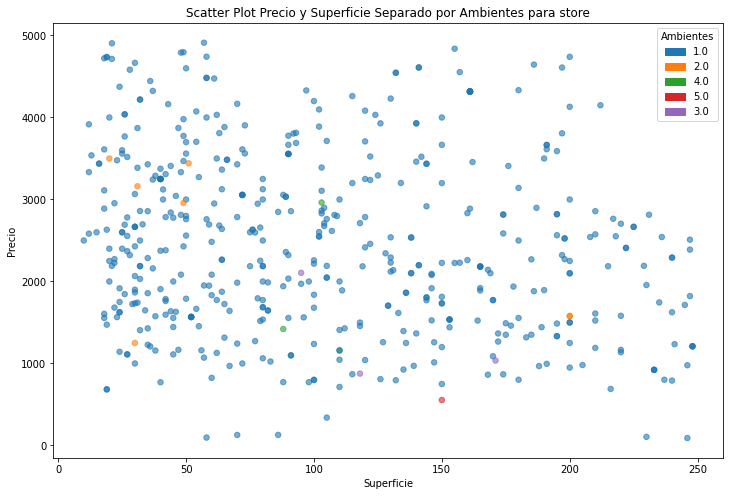

In [71]:
df_caba_apartment = df_caba.loc[df_caba['property_type'] == 'store' , :]
df_caba_filter_apartment = df_caba_apartment.loc[(df_caba_apartment['surface_covered_in_m2'] < 250) & (df_caba_apartment['price_usd_per_m2'] < 5000)]

levels, categories = pd.factorize(df_caba_filter_apartment['ambientes'])
colors = [plt.cm.tab10(i) for i in levels] 
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

plt.scatter(df_caba_filter_apartment['surface_covered_in_m2'],df_caba_filter_apartment['price_usd_per_m2'], s=30, alpha=0.6, c =colors)
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.title('Scatter Plot Precio y Superficie Separado por Ambientes para store')
plt.legend(handles=handles, title='Ambientes')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

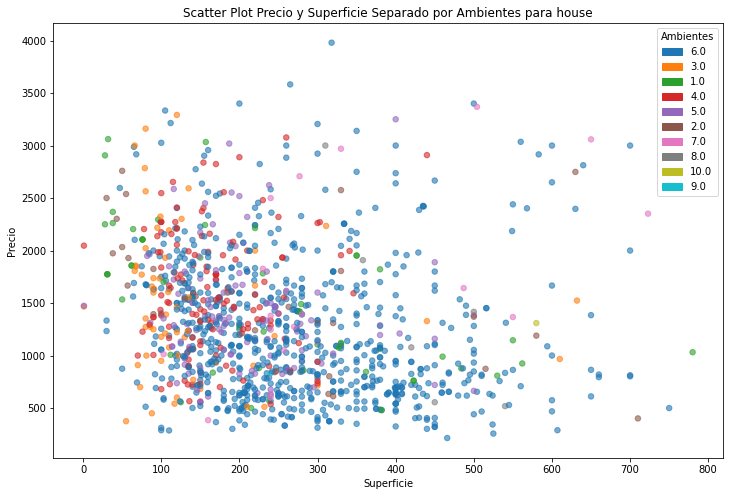

In [72]:
df_caba_apartment = df_caba.loc[df_caba['property_type'] == 'house' , :]
df_caba_filter_apartment = df_caba_apartment.loc[(df_caba_apartment['surface_covered_in_m2'] < 800) & (df_caba_apartment['price_usd_per_m2'] < 4000)]




levels, categories = pd.factorize(df_caba_filter_apartment['ambientes'])
colors = [plt.cm.tab10(i) for i in levels] 
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

plt.scatter(df_caba_filter_apartment['surface_covered_in_m2'],df_caba_filter_apartment['price_usd_per_m2'], s=30, alpha=0.6, c =colors)
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.title('Scatter Plot Precio y Superficie Separado por Ambientes para house')
plt.legend(handles=handles, title='Ambientes')
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

<html><h1 align="center", style="background: #414ce8; color:white">Boxplots</h1></html>

[**Volver al Inicio**](#Índice-del-análisis) 

In [73]:
#Definir cotizacion del dolar
(data['price_aprox_local_currency']/data['price_aprox_usd']).mean()

17.644499988448175

In [74]:
data.groupby('state_name')['price'].count()

state_name
Bs.As. G.B.A. Zona Norte        24058
Bs.As. G.B.A. Zona Oeste         7333
Bs.As. G.B.A. Zona Sur          12085
Buenos Aires Costa Atlántica     9059
Buenos Aires Interior            1814
Capital Federal                 29018
Catamarca                          26
Chaco                              36
Chubut                            164
Corrientes                        470
Córdoba                          9038
Entre Ríos                        130
Formosa                            29
Jujuy                              10
La Pampa                           36
La Rioja                            2
Mendoza                           476
Misiones                          348
Neuquén                           324
Río Negro                         361
Salta                             102
San Juan                            4
San Luis                          208
Santa Cruz                         19
Santa Fe                         5413
Santiago Del Estero                 3
T

In [75]:
df = px.data.tips()
fig = px.box(df_caba, x="place_name", y="price_usd_per_m2", points="all")#, color ='property_type')
fig.show()
#Sectorizar los barrios por precios y recortar outliers

In [76]:
df = px.data.tips()
fig = px.box(df_caba, x="place_name", y="price_usd_per_m2", color ='property_type')
fig.show()

**Trabajo sobre el precio**

---



---



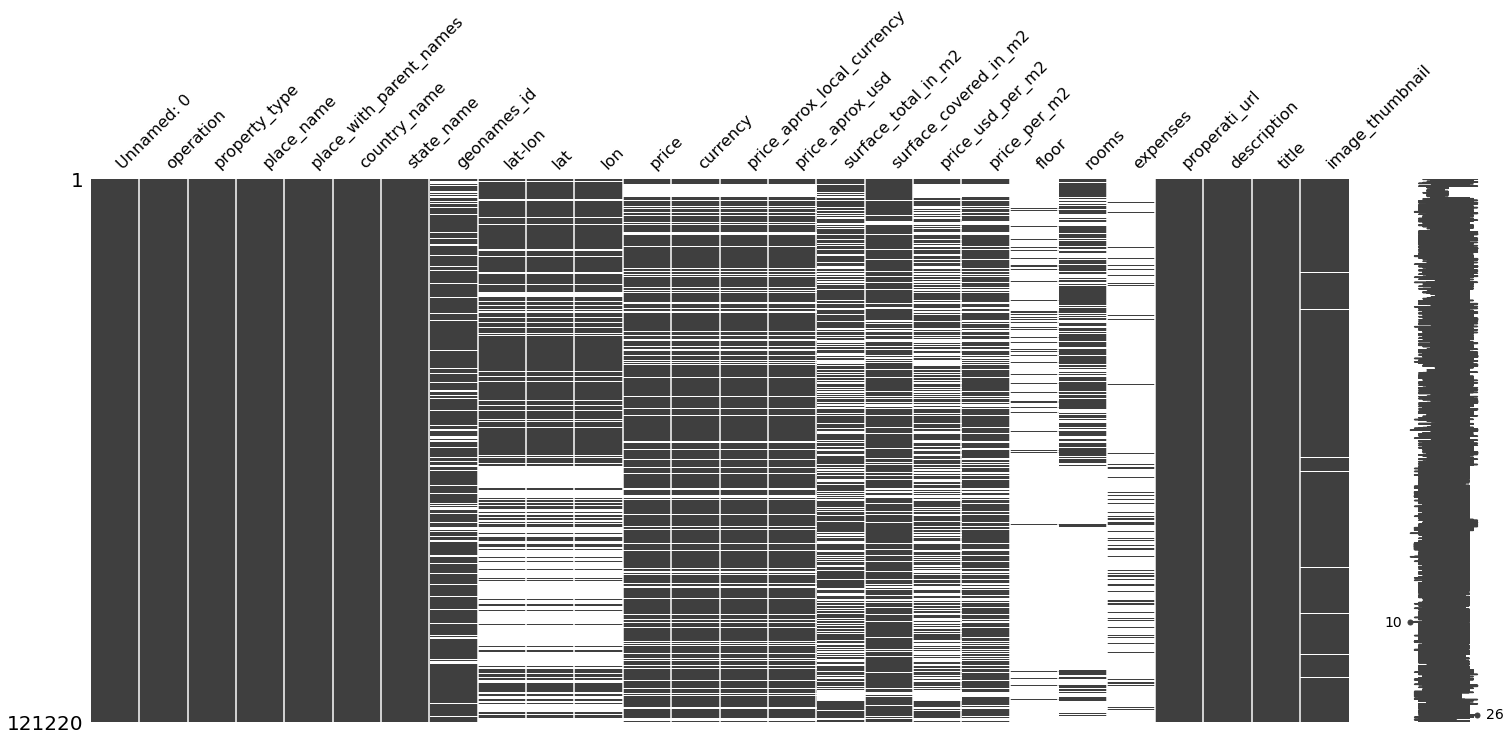

In [77]:
import missingno as msno
msno.matrix(data);

In [78]:
#Definir cotizacion del dolar
precio_dolar = (data['price_aprox_local_currency']/data['price_aprox_usd']).mean()

In [79]:
display(df_caba[df_caba.currency == "ARS"].price.nlargest(10))

#df_caba[df_caba.currency == "ARS"]["price"] = df_caba[df_caba.currency == "ARS"]["price"]/precio_dolar
df_caba['price_usd'] = df_caba.apply(lambda x: x["price"]/precio_dolar if x['currency'] == "ARS" else x['price'], axis=1)

display(df_caba[df_caba.currency == "ARS"].price.nlargest(10))
display(df_caba.price_usd.nlargest(10))

18015    20218922.0
24888    19267560.0
19924    16928402.0
18025    16004351.0
25051    14084315.0
23920    12635948.0
28196    12635918.0
19232    12581296.0
23941    11944020.0
19226    11736284.0
Name: price, dtype: float64

18015    20218922.0
24888    19267560.0
19924    16928402.0
18025    16004351.0
25051    14084315.0
23920    12635948.0
28196    12635918.0
19232    12581296.0
23941    11944020.0
19226    11736284.0
Name: price, dtype: float64

2471     8500000.0
16998    8500000.0
16553    8000000.0
16698    6500000.0
16994    6500000.0
3023     6200000.0
14217    6200000.0
11155    5800000.0
16749    5500000.0
14323    5000000.0
Name: price_usd, dtype: float64

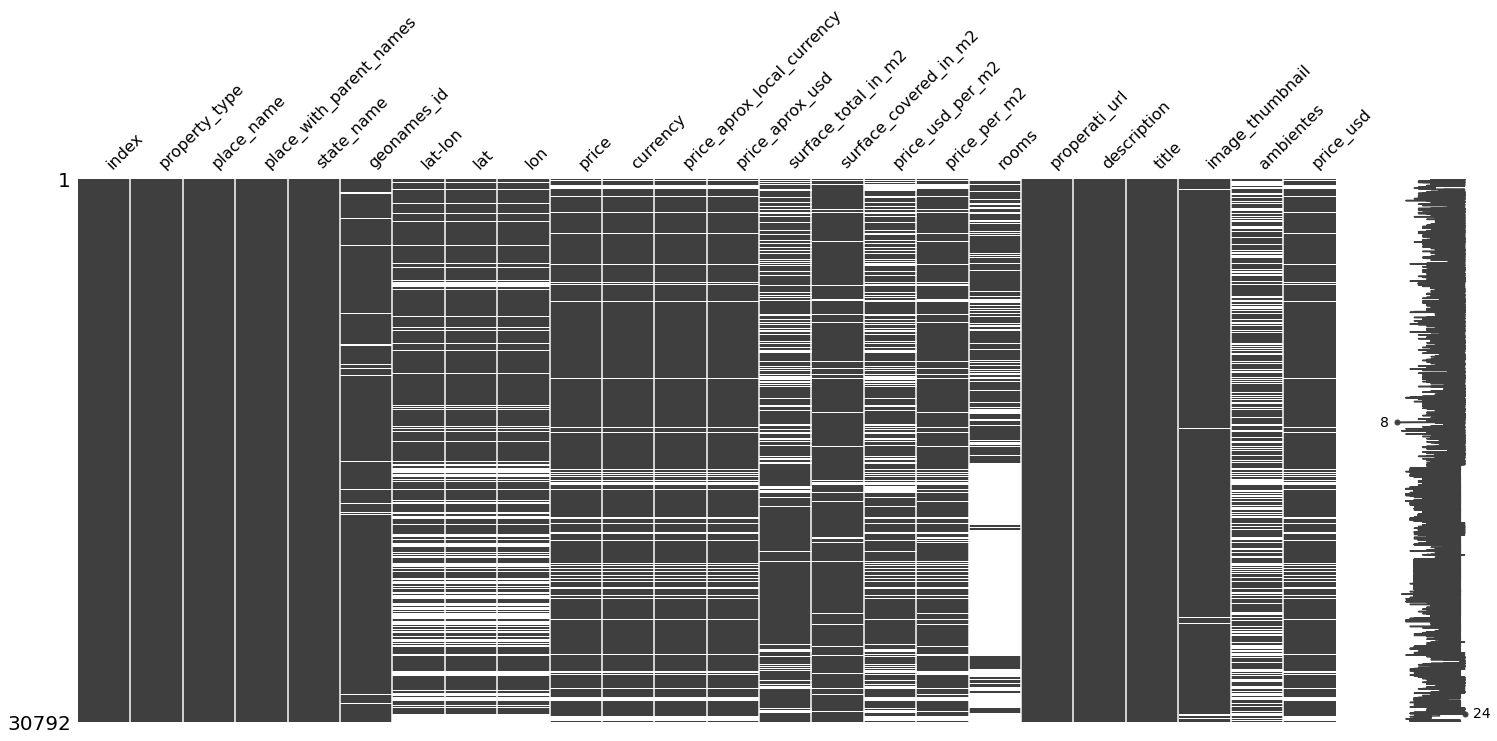

In [80]:
msno.matrix(df_caba);

<html><h1 align="center", style="background: #414ce8; color:white">Geopandas</h1></html>

[**Volver al Inicio**](#Índice-del-análisis) 

In [81]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 351 kB/s 
     |████████████████████████████████| 6.3 MB 48.4 MB/s 


In [82]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.wkt


In [83]:
df_caba = df_caba[df_caba['lon'] < -35.0]
df_caba.head()

index property_type place_name                place_with_parent_names  \
0      0            PH  Mataderos  |Argentina|Capital Federal|Mataderos|   
1      1     apartment  Mataderos  |Argentina|Capital Federal|Mataderos|   
2      2            PH    Liniers    |Argentina|Capital Federal|Liniers|   
3      3     apartment   Belgrano   |Argentina|Capital Federal|Belgrano|   
4      4     apartment   Belgrano   |Argentina|Capital Federal|Belgrano|   

        state_name  geonames_id                  lat-lon        lat  \
0  Capital Federal    3430787.0  -34.6618237,-58.5088387 -34.661824   
1  Capital Federal    3430787.0  -34.6522615,-58.5229825 -34.652262   
2  Capital Federal    3431333.0  -34.6477969,-58.5164244 -34.647797   
3  Capital Federal    3436077.0   -34.5598729,-58.443362 -34.559873   
4  Capital Federal    3436077.0   -34.5598729,-58.443362 -34.559873   

         lon     price  ... surface_covered_in_m2  price_usd_per_m2  \
0 -58.508839   62000.0  ...                  40.0       1127.272727   
1 -58.522982   72000.0  ...                  55.0       1309.090909   
2 -58.516424   95000.0  ...                   NaN               NaN   
3 -58.443362  138000.0  ...                  40.0       3066.666667   
4 -58.443362  195000.0  ...                  60.0       3000.000000   

   price_per_m2  rooms                                      properati_url  \
0   1550.000000    NaN  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1   1309.090909    NaN  http://www.properati.com.ar/15bod_venta_depart...   
2           NaN    NaN  http://www.properati.com.ar/15boh_venta_ph_lin...   
3   3450.000000    NaN  http://www.properati.com.ar/15bot_venta_depart...   
4   3250.000000    NaN  http://www.properati.com.ar/15bou_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   
2  PH 3 ambientes con patio. Hay 3 deptos en lote...   
3  EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...   
4  EXCELENTE DOS AMBIENTES  ESTRENAR AMPLIO SUPER...   

                                               title  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB   
1           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   
2                       PH 3 amb. cfte. reciclado      
3  JOSE HERNANDEZ 1400 MONOAMBIENTE  ESTRENAR CAT...   
4  JOSE HERNANDEZ   1400 DOS AMBIENTES ESTRENAR ,...   

                                     image_thumbnail ambientes price_usd  
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...       2.0   62000.0  
1  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...       2.0   72000.0  
2  https://thumbs4.properati.com/3/DgIfX-85Mog5SP...       3.0   95000.0  
3  https://thumbs4.properati.com/1/IHxARynlr8sPEW...       1.0  138000.0  
4  https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...       2.0  195000.0  

[5 rows x 24 columns]

In [84]:
median_lon_mataderos = df_caba.loc[df_caba['place_name'] == 'Mataderos', ['lon']].median()
median_lat_mataderos = df_caba.loc[df_caba['place_name'] == 'Mataderos', ['lat']].median()
df_caba['lon'].replace(float(df_caba[df_caba['lon'] < -63]['lon']), float(median_lon_mataderos), inplace=True)
df_caba['lat'].replace(float(df_caba[df_caba['lat'] < -38]['lat']), float(median_lat_mataderos), inplace=True)

#display(geo_caba['lat'].nsmallest(5))
#geo_caba = geo_caba.drop(index=(28512))
#geo_caba = geo_caba.drop(index=(7238))
#display(geo_caba['lat'].nsmallest(5))

In [85]:
geo_caba = gpd.GeoDataFrame(df_caba, geometry = gpd.points_from_xy(df_caba.lon, df_caba.lat))
barrios = pd.read_csv("/content/drive/MyDrive/TP Data Science/barrios.csv", encoding='latin1')
barrios["WKT"] = barrios["WKT"].apply(shapely.wkt.loads) 
geo_barrios = gpd.GeoDataFrame(barrios, geometry='WKT')

In [86]:
display(df_caba.lon.nsmallest(5))

5760    -58.544722
15781   -58.542461
16108   -58.542461
3109    -58.538654
3110    -58.538654
Name: lon, dtype: float64

In [87]:
display(geo_caba['price_per_m2'].nsmallest(5))
display(geo_caba['price_per_m2'].nlargest(5))
geo_caba["log_price"] = np.log10(geo_caba["price_usd"])

19502     3.208556
13910    15.078671
27081    16.528926
29133    18.480493
13987    20.183486
Name: price_per_m2, dtype: float64

7794     2600000.0
19576     692046.0
13452     650000.0
11765     510000.0
28250     480351.1
Name: price_per_m2, dtype: float64

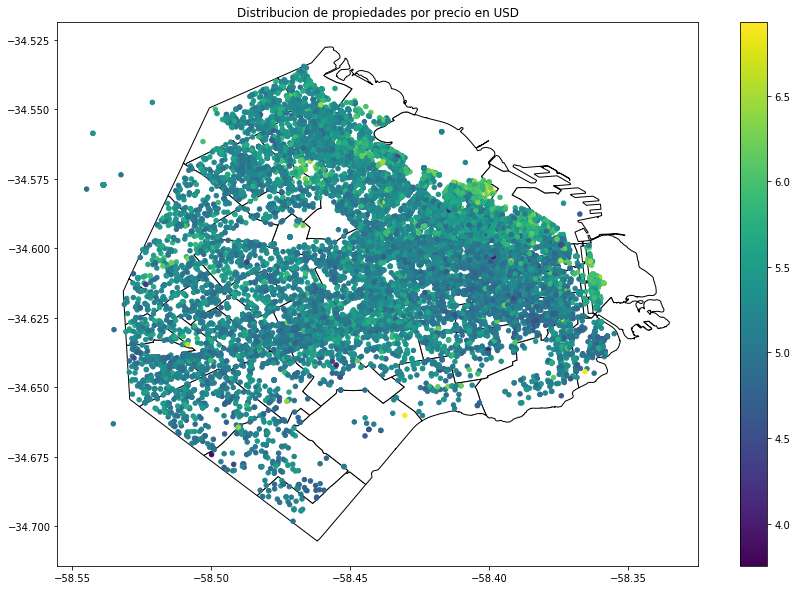

In [98]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_aspect('equal')
geo_barrios.plot(ax=ax, color='white', edgecolor='black')
geo_caba.plot(ax=ax, marker='o',legend=True, column="log_price", markersize=20)
plt.title("Distribucion de propiedades por precio en USD")
plt.show();


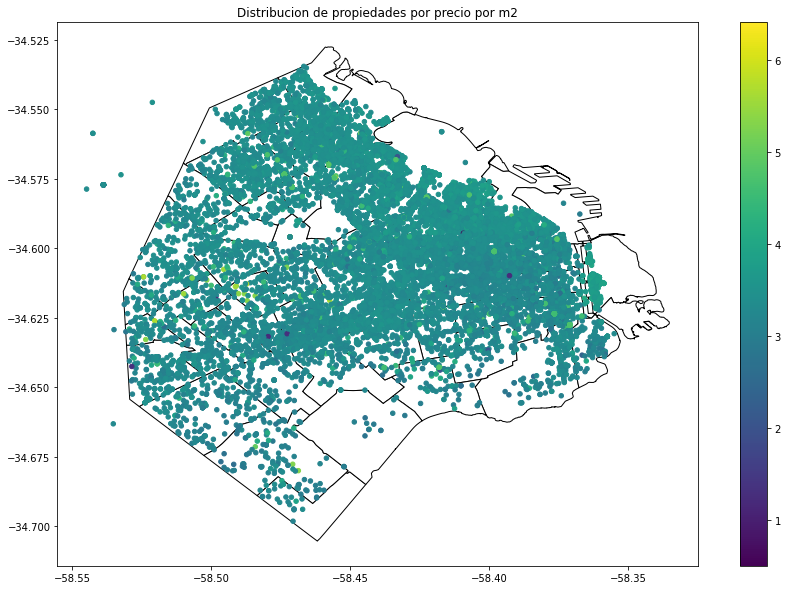

In [99]:
geo_caba["log_price_per_m2"] = np.log10(geo_caba["price_per_m2"])
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_aspect('equal')
geo_barrios.plot(ax=ax, color='white', edgecolor='black')
geo_caba.plot(ax=ax, marker='o',legend=True, column="log_price_per_m2", markersize=20)
plt.title("Distribucion de propiedades por precio por m2")
plt.show();

In [90]:
geo_caba.place_name = geo_caba.place_name.apply(lambda x : x.title())
barrio_dic = {"Agronomía": "Agronomia", "Constitución":"Constitucion", "Villa General Mitre": "Villa Gral. Mitre", "Pompeya": "Nueva Pompeya", "Villa Pueyrredón": "Villa Pueyrredon", "San Nicolás":"San Nicolas"}
geo_caba = geo_caba.replace({"place_name":barrio_dic})
geo_caba_stats = geo_caba.groupby('place_name')['price_usd_per_m2'].describe()
geo_caba_stats.drop('max', inplace=True, axis=1)
geo_caba_stats.drop('min', inplace=True, axis=1)
geo_caba_stats.drop('std', inplace=True, axis=1)
geo_caba_stats.drop('25%', inplace=True, axis=1)
geo_caba_stats.drop('75%', inplace=True, axis=1)
geo_caba_stats.drop('50%', inplace=True, axis=1)
#geo_caba_stats

In [91]:
geo_barrios['BARRIO'] = geo_barrios['BARRIO'].apply(lambda x : x.title())

#geo_barrios.sort_values(by = 'BARRIO', ascending = True)

In [92]:
geo_barrios = geo_barrios.set_index(geo_barrios['BARRIO'])
#geo_barrios

In [93]:
geo_barrios_caba_stats = pd.concat([geo_barrios, geo_caba_stats], axis=1, sort=False)
geo_barrios_caba_stats[~(geo_barrios_caba_stats["mean"] > 0)]

Empty GeoDataFrame
Columns: [WKT, BARRIO, COMUNA, PERIMETRO, AREA, count, mean]
Index: []

In [94]:
geo_barrios_caba_stats.drop('COMUNA', inplace=True, axis=1)
geo_barrios_caba_stats.drop('AREA', inplace=True, axis=1)
geo_barrios_caba_stats.drop('PERIMETRO', inplace=True, axis=1)


In [95]:
mask_wkt = geo_barrios_caba_stats['WKT'] != None
geo_barrios_precio = geo_barrios_caba_stats[mask_wkt]
#geo_barrios_precio.sort_values(by = 'mean', ascending = False)

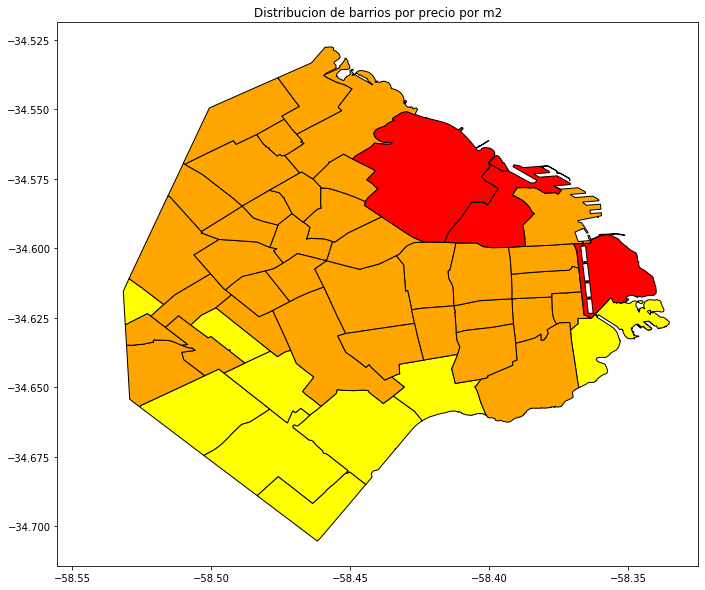

In [96]:
geo_barrios_barato = geo_barrios_precio[geo_barrios_precio['mean'] <= 1500]
geo_barrios_medio = geo_barrios_precio[(geo_barrios_precio['mean'] > 1500) & (geo_barrios_precio['mean'] < 3000)]
geo_barrios_caro = geo_barrios_precio[geo_barrios_precio['mean'] >= 3000]

fig, ax = plt.subplots(figsize=(15, 10))

Bajo = geo_barrios_barato.plot(ax=ax, color='yellow', edgecolor='black', label= "Precio Bajo")
Medio = geo_barrios_medio.plot(ax=ax, color='orange', edgecolor='black', label= "Precio Medio")
Alto = geo_barrios_caro.plot(ax=ax, color='red', edgecolor='black', label= "Precio Alto")
geo_caba['geometry'].plot(ax=ax, marker='o', color='orange', markersize=40, alpha = 0)
plt.title("Distribucion de barrios por precio por m2")
#ax.legend(handles=[Bajo, Medio, Alto])
plt.show()

In [97]:
df_caba.groupby("place_name").describe().price_usd_per_m2[:20]

count         mean          std          min  \
place_name                                                            
Abasto                  59.0  1998.555785   520.771529   914.893617   
Agronomía               25.0  2088.124134   465.567568   860.323887   
Almagro                705.0  2151.472369   458.317836   467.796610   
Balvanera              420.0  1902.288408   526.192981   711.538462   
Barracas               298.0  1856.097298   563.064673   401.408451   
Barrio Norte           716.0  2919.361130   794.047689   970.149254   
Belgrano              1419.0  2938.747662   625.302318  1000.000000   
Boca                    87.0  1455.193787   481.685982   214.592275   
Boedo                  202.0  2361.466716  2389.926793   789.473684   
Caballito             1358.0  2400.635573   484.529509   288.888889   
Capital Federal        252.0  1877.159692   879.771501   350.140056   
Catalinas                1.0  1833.333333          NaN  1833.333333   
Centro / Microcentro   173.0  2192.699776   708.851690    39.950000   
Chacarita              113.0  2174.356218   445.280618  1086.363636   
Coghlan                161.0  2497.982697   477.365331   848.639456   
Colegiales             222.0  2503.565488   534.494493  1134.146341   
Congreso               165.0  1912.710989   480.816336   628.571429   
Constitución           144.0  1776.697699   445.612393   516.000000   
Flores                 869.0  2013.489473   529.554481    96.695862   
Floresta               267.0  1709.721742   476.426193   365.833333   

                              25%          50%          75%           max  
place_name                                                                 
Abasto                1586.762075  2009.132420  2375.289575   2857.142857  
Agronomía             1948.437500  2187.500000  2381.818182   2638.297872  
Almagro               1898.734177  2131.578947  2408.333333   4000.000000  
Balvanera             1607.350272  1848.913043  2157.051282   5555.555556  
Barracas              1532.209430  1815.340909  2216.666667   3333.333333  
Barrio Norte          2364.434524  2788.461538  3323.333333   6900.000000  
Belgrano              2541.346154  2893.081761  3315.748123   5500.000000  
Boca                  1183.216783  1532.258065  1805.216802   2354.838710  
Boedo                 1420.584046  1907.438424  2266.037736  13340.000000  
Caballito             2108.356290  2389.380531  2728.246753   3676.000000  
Capital Federal       1278.326746  1877.976190  2382.826087   5138.888889  
Catalinas             1833.333333  1833.333333  1833.333333   1833.333333  
Centro / Microcentro  1803.278689  2198.581560  2475.862069   4032.258065  
Chacarita             1857.142857  2191.250000  2472.222222   3333.333333  
Coghlan               2250.000000  2525.000000  2795.180723   3500.000000  
Colegiales            2157.844072  2461.011905  2835.291001   3788.461538  
Congreso              1540.880503  1914.285714  2205.882353   3216.666667  
Constitución          1500.000000  1783.255814  2034.075798   3333.333333  
Flores                1673.913043  2065.217391  2321.428571   4316.770186  
Floresta              1374.163116  1743.589744  2068.266542   3000.000000